In [8]:
import random
from geneticanalyzer import GeneticAnalyzer

In [9]:
def fitness_function(individual):
    # Simple fitness function: maximize the sum of the individual's values
    return sum(individual)

In [10]:
def create_individual(size):
    return [random.randint(0, 1) for _ in range(size)]

In [11]:
def mutate(individual, mutation_rate=0.1):
    mutated = individual[:]
    for i in range(len(mutated)):
        if random.random() < mutation_rate:
            mutated[i] = 1 - mutated[i]  # Flip bit
    return mutated

In [12]:
def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

In [13]:
def genetic_algorithm():
    population_size = 10
    generations = 5
    individual_size = 6
    mutation_rate = 0.2

    analyzer = GeneticAnalyzer()

    # Initial population
    population = [create_individual(individual_size) for _ in range(population_size)]
    for individual in population:
        fitness = fitness_function(individual)
        analyzer.add_individual({"genes": individual, "fitness": fitness}, generation=0)

    # Evolve generations
    for generation in range(generations):
        print(f"Generation {generation}")
        new_population = []

        # Selection (elitism: keep the best individual)
        sorted_population = sorted(analyzer.population, key=lambda x: x["fitness"], reverse=True)
        best_individual = sorted_population[0]
        new_population.append(best_individual["genes"])

        # Generate new population via crossover and mutation
        while len(new_population) < population_size:
            parent1 = random.choice(sorted_population)
            parent2 = random.choice(sorted_population)
            child1_genes, child2_genes = crossover(parent1["genes"], parent2["genes"])

            child1_genes = mutate(child1_genes, mutation_rate)
            child2_genes = mutate(child2_genes, mutation_rate)

            child1_fitness = fitness_function(child1_genes)
            child2_fitness = fitness_function(child2_genes)

            analyzer.add_individual({"genes": child1_genes, "fitness": child1_fitness}, 
                                               parents=[analyzer.population.index(parent1), analyzer.population.index(parent2)],
                                               mutation_info="Mutation Applied",
                                               generation=generation)

            analyzer.add_individual({"genes": child2_genes, "fitness": child2_fitness}, 
                                               parents=[analyzer.population.index(parent1), analyzer.population.index(parent2)],
                                               mutation_info="Mutation Applied",
                                               generation=generation),

            new_population.append(child1_genes)
            new_population.append(child2_genes)

        analyzer.generation += 1
        analyzer.plot_fitness_over_generations()  # Optional: live tracking of fitness

    # Visualize the final family tree
    best_individual_id = analyzer.population.index(best_individual)
    # Track generations and visualize fitness over time
    analyzer.visualize_tree(highlight_best=best_individual_id)

Generation 0


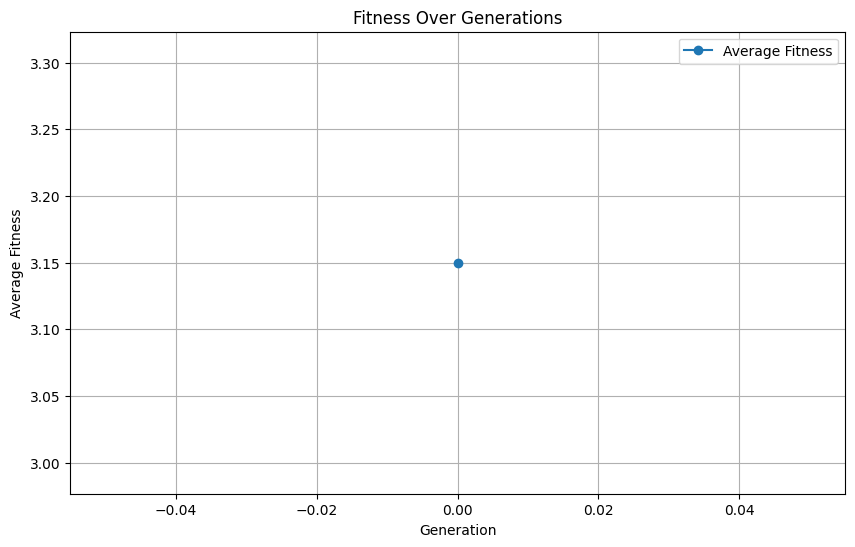

Generation 1


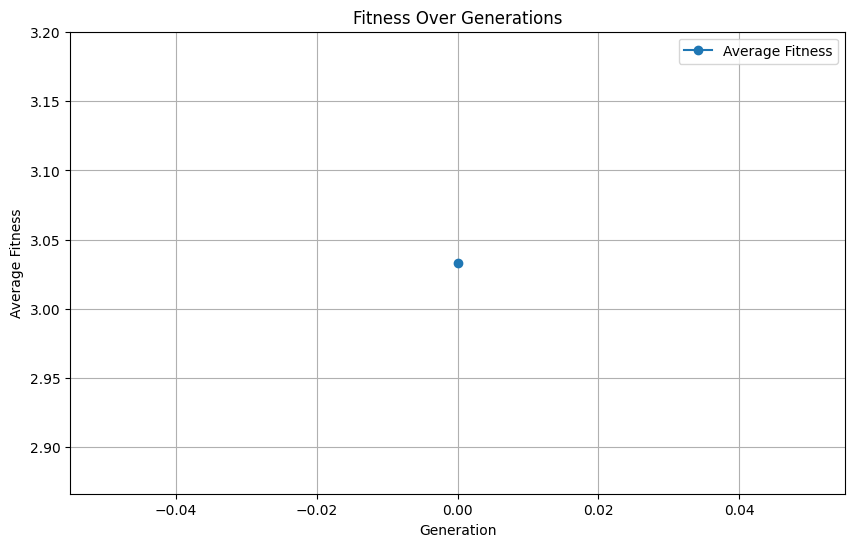

Generation 2


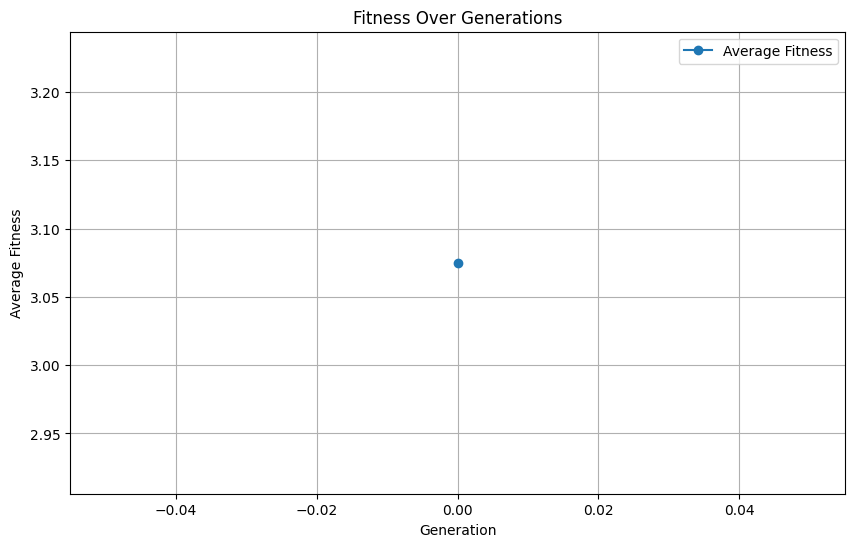

Generation 3


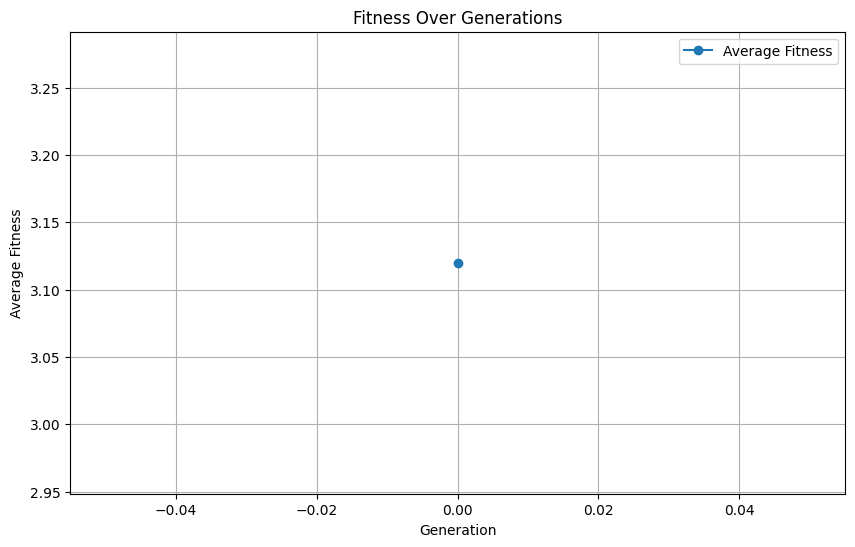

Generation 4


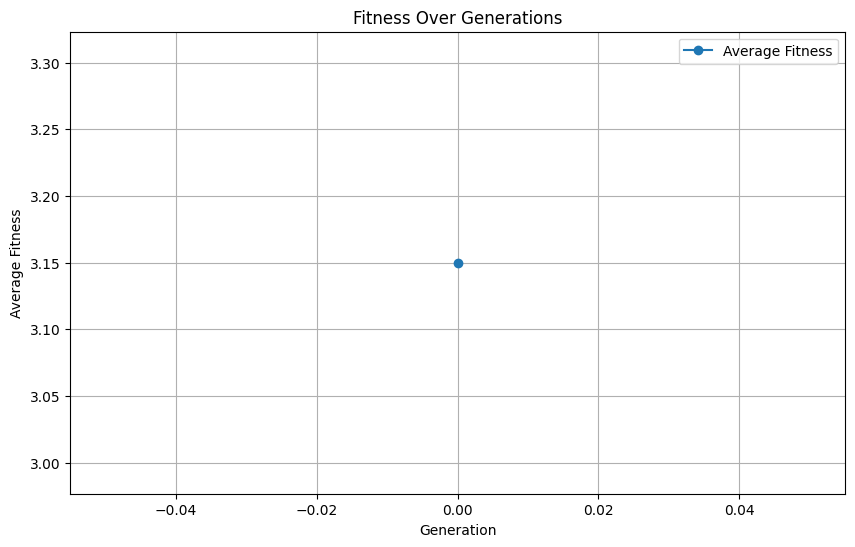

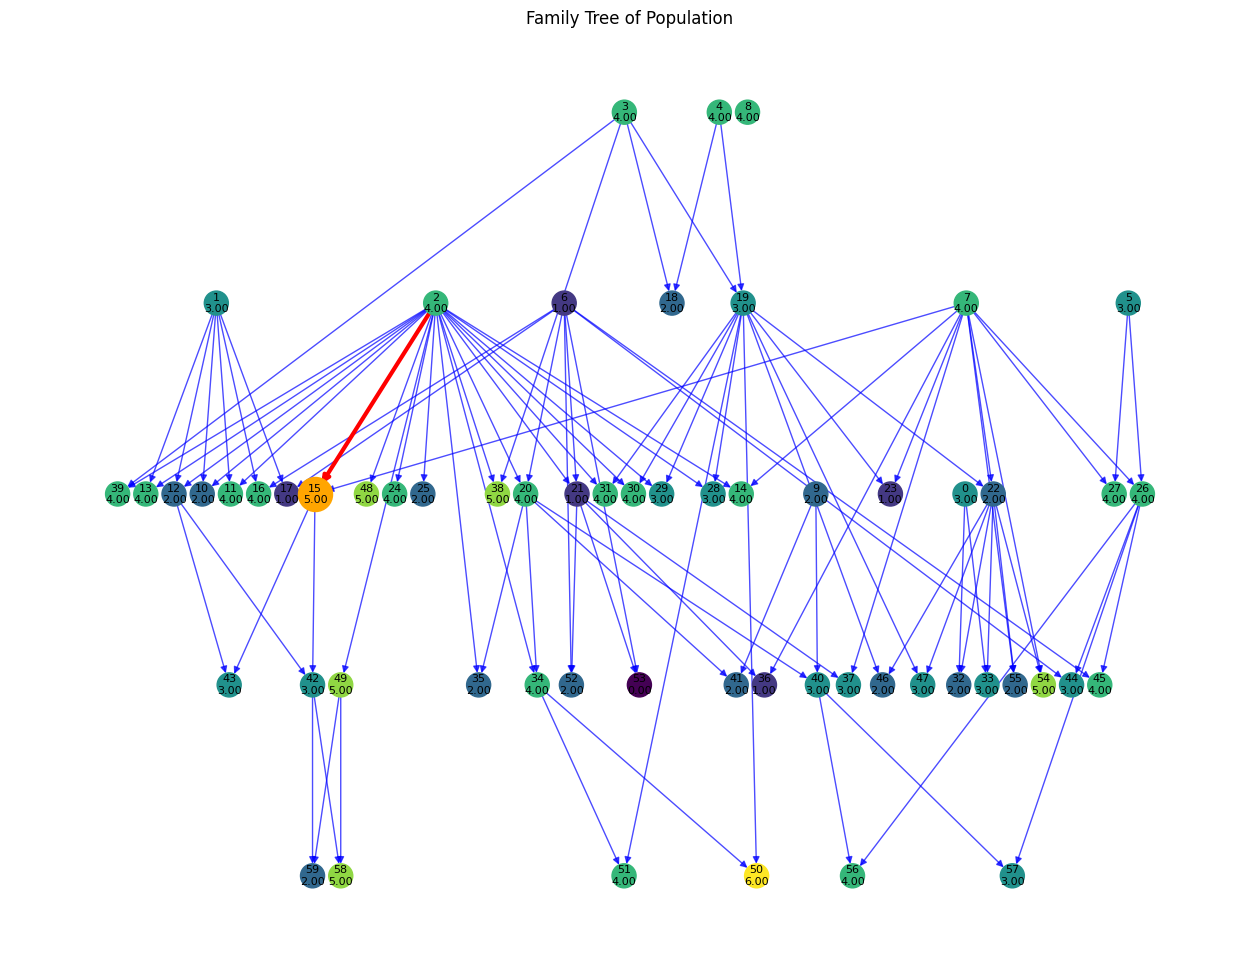

In [14]:
genetic_algorithm()